# Dependencies

In [79]:
import pandas as pd
from urllib.parse import urlparse
import hashlib
import nltk
from nltk.corpus import stopwords
import re

# Read data

In [80]:
pd.options.display.max_rows = 5

TEB_encontrados = pd.read_csv('teestamosbuscando_2019_11_17_found_people_profiles.csv', encoding='latin-1')

TEB_encontrados

,age,circumstances,clothing,complaint_date,disappearance_date,district,eyes_color,gender,hair_color,height,informant_name,informant_phone,mouth_size,name,nose,province,race,state,url
0,14.0,Salió de su casa.,Chompa blanca y pantalón morado.,"Martes, 12 Noviembre, 2019 - 00:00",2019-11-12T00:00:00-05:00,Mi Perú,COLOR NEGRO,Femenino,COLOR NEGRO,1.50,NaN,942072845 - Central de Desaparecidos,MEDIANA,Pricila Dayana Merino Gallo,ANGULAR,Prov. Const. del Callao,MESTIZA,Callao,https://teestamosbuscando.pe//desaparecido/pri...
1,14.0,Salió de su domicilio,"Polo anaranjado, buzo azul zapatillas negras.","Lunes, 11 Noviembre, 2019 - 00:00",2019-11-11T00:00:00-05:00,Santa Anita,OSCUROS ACHINADOS,Femenino,LACIO NEGRO,1.53,NaN,942 072 845 - Central de Desaparecidos,MEDIANA,Azumi Katiuzca Suárez Meza,RECTA,Lima,MESTIZA,Lima,https://teestamosbuscando.pe//desaparecido/azu...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,17.0,Salió de su domicilio sin indicar destino.,Lleva una mochila negra.,"Martes, 13 Marzo, 2018 - 12:15",NaN,San Martin de Porres,NEGROS,Femenino,NEGROS CORTO,150,Genesis Katherine Rojas Fernandez,972714451,MEDIANA,Rojas Fernandez Verónica Sofía,RECTA,Lima,MESTIZA,Lima,https://teestamosbuscando.pe//desaparecido/roj...
2017,12.0,Salió del puesto de pollos ubicado en la Av. H...,"Una falda de lana color azul oscuro, buzo de c...","Lunes, 16 Julio, 2018 - 00:00",NaN,El Tambo,NEGROS,Femenino,COLOR NEGRO MEDIANO,1.50,NaN,957951266,LABIOS DELGADOS,Rocío Pilar Zorrilla Vargas,RESPINGADA,Huancayo,NaN,Junín,https://teestamosbuscando.pe//desaparecido/roc...


# Data wrangling

In [81]:
TEB_encontrados['site-uid'] = 'TEB_encontrados'

TEB_encontrados

,age,circumstances,clothing,complaint_date,disappearance_date,district,eyes_color,gender,hair_color,height,informant_name,informant_phone,mouth_size,name,nose,province,race,state,url,site-uid
0,14.0,Salió de su casa.,Chompa blanca y pantalón morado.,"Martes, 12 Noviembre, 2019 - 00:00",2019-11-12T00:00:00-05:00,Mi Perú,COLOR NEGRO,Femenino,COLOR NEGRO,1.50,NaN,942072845 - Central de Desaparecidos,MEDIANA,Pricila Dayana Merino Gallo,ANGULAR,Prov. Const. del Callao,MESTIZA,Callao,https://teestamosbuscando.pe//desaparecido/pri...,TEB_encontrados
1,14.0,Salió de su domicilio,"Polo anaranjado, buzo azul zapatillas negras.","Lunes, 11 Noviembre, 2019 - 00:00",2019-11-11T00:00:00-05:00,Santa Anita,OSCUROS ACHINADOS,Femenino,LACIO NEGRO,1.53,NaN,942 072 845 - Central de Desaparecidos,MEDIANA,Azumi Katiuzca Suárez Meza,RECTA,Lima,MESTIZA,Lima,https://teestamosbuscando.pe//desaparecido/azu...,TEB_encontrados
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,17.0,Salió de su domicilio sin indicar destino.,Lleva una mochila negra.,"Martes, 13 Marzo, 2018 - 12:15",NaN,San Martin de Porres,NEGROS,Femenino,NEGROS CORTO,150,Genesis Katherine Rojas Fernandez,972714451,MEDIANA,Rojas Fernandez Verónica Sofía,RECTA,Lima,MESTIZA,Lima,https://teestamosbuscando.pe//desaparecido/roj...,TEB_encontrados
2017,12.0,Salió del puesto de pollos ubicado en la Av. H...,"Una falda de lana color azul oscuro, buzo de c...","Lunes, 16 Julio, 2018 - 00:00",NaN,El Tambo,NEGROS,Femenino,COLOR NEGRO MEDIANO,1.50,NaN,957951266,LABIOS DELGADOS,Rocío Pilar Zorrilla Vargas,RESPINGADA,Huancayo,NaN,Junín,https://teestamosbuscando.pe//desaparecido/roc...,TEB_encontrados


In [82]:
TEB_encontrados['host'] = TEB_encontrados['url'].apply(lambda url: urlparse(url).netloc)

TEB_encontrados

,age,circumstances,clothing,complaint_date,disappearance_date,district,eyes_color,gender,hair_color,height,...,informant_phone,mouth_size,name,nose,province,race,state,url,site-uid,host
0,14.0,Salió de su casa.,Chompa blanca y pantalón morado.,"Martes, 12 Noviembre, 2019 - 00:00",2019-11-12T00:00:00-05:00,Mi Perú,COLOR NEGRO,Femenino,COLOR NEGRO,1.50,...,942072845 - Central de Desaparecidos,MEDIANA,Pricila Dayana Merino Gallo,ANGULAR,Prov. Const. del Callao,MESTIZA,Callao,https://teestamosbuscando.pe//desaparecido/pri...,TEB_encontrados,teestamosbuscando.pe
1,14.0,Salió de su domicilio,"Polo anaranjado, buzo azul zapatillas negras.","Lunes, 11 Noviembre, 2019 - 00:00",2019-11-11T00:00:00-05:00,Santa Anita,OSCUROS ACHINADOS,Femenino,LACIO NEGRO,1.53,...,942 072 845 - Central de Desaparecidos,MEDIANA,Azumi Katiuzca Suárez Meza,RECTA,Lima,MESTIZA,Lima,https://teestamosbuscando.pe//desaparecido/azu...,TEB_encontrados,teestamosbuscando.pe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,17.0,Salió de su domicilio sin indicar destino.,Lleva una mochila negra.,"Martes, 13 Marzo, 2018 - 12:15",NaN,San Martin de Porres,NEGROS,Femenino,NEGROS CORTO,150,...,972714451,MEDIANA,Rojas Fernandez Verónica Sofía,RECTA,Lima,MESTIZA,Lima,https://teestamosbuscando.pe//desaparecido/roj...,TEB_encontrados,teestamosbuscando.pe
2017,12.0,Salió del puesto de pollos ubicado en la Av. H...,"Una falda de lana color azul oscuro, buzo de c...","Lunes, 16 Julio, 2018 - 00:00",NaN,El Tambo,NEGROS,Femenino,COLOR NEGRO MEDIANO,1.50,...,957951266,LABIOS DELGADOS,Rocío Pilar Zorrilla Vargas,RESPINGADA,Huancayo,NaN,Junín,https://teestamosbuscando.pe//desaparecido/roc...,TEB_encontrados,teestamosbuscando.pe


# Duplicate values

In [83]:
TEB_encontrados['name'].value_counts()

Bryan Aldair Pariona Encarnación      4
Gao Ocharan Carlos Antonio            3
                                     ..
Dario Chino Ccorihuaman               1
Ariana Jhoselyne Alama Arrunategui    1
Name: name, Length: 1948, dtype: int64

In [84]:
TEB_encontrados.drop_duplicates(subset=['name'], keep='first', inplace=True)

# Aditional cleanup

In [85]:
uids = (TEB_encontrados
        .apply(lambda row: hashlib.md5(bytes(row['url'].encode())), axis=1)
        .apply(lambda hash_object: hash_object.hexdigest())
)

TEB_encontrados['uid'] = uids
TEB_encontrados.set_index('uid')

TEB_encontrados

,age,circumstances,clothing,complaint_date,disappearance_date,district,eyes_color,gender,hair_color,height,...,mouth_size,name,nose,province,race,state,url,site-uid,host,uid
0,14.0,Salió de su casa.,Chompa blanca y pantalón morado.,"Martes, 12 Noviembre, 2019 - 00:00",2019-11-12T00:00:00-05:00,Mi Perú,COLOR NEGRO,Femenino,COLOR NEGRO,1.50,...,MEDIANA,Pricila Dayana Merino Gallo,ANGULAR,Prov. Const. del Callao,MESTIZA,Callao,https://teestamosbuscando.pe//desaparecido/pri...,TEB_encontrados,teestamosbuscando.pe,7a6957d1f250c29ee7f99ccdc7e00c71
1,14.0,Salió de su domicilio,"Polo anaranjado, buzo azul zapatillas negras.","Lunes, 11 Noviembre, 2019 - 00:00",2019-11-11T00:00:00-05:00,Santa Anita,OSCUROS ACHINADOS,Femenino,LACIO NEGRO,1.53,...,MEDIANA,Azumi Katiuzca Suárez Meza,RECTA,Lima,MESTIZA,Lima,https://teestamosbuscando.pe//desaparecido/azu...,TEB_encontrados,teestamosbuscando.pe,168799150380f1868ff680421262d4ac
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,14.0,El 14 de octubre del 2017 a horas 07:30 aprox....,"Casaca larga color verde ancho, zapatilla colo...","Martes, 6 Marzo, 2018 - 12:30",2017-10-12T19:00:00-05:00,San Martin de Porres,MARRONES CLAROS,Masculino,ONDULADO,178,...,LABIOS DELGADOS,Salas Vera Joel Adrián,DELGADA,Lima,CLARA,Lima,https://teestamosbuscando.pe//desaparecido/sal...,TEB_encontrados,teestamosbuscando.pe,f6230c65230c4852b25db12df5380f61
2017,12.0,Salió del puesto de pollos ubicado en la Av. H...,"Una falda de lana color azul oscuro, buzo de c...","Lunes, 16 Julio, 2018 - 00:00",NaN,El Tambo,NEGROS,Femenino,COLOR NEGRO MEDIANO,1.50,...,LABIOS DELGADOS,Rocío Pilar Zorrilla Vargas,RESPINGADA,Huancayo,NaN,Junín,https://teestamosbuscando.pe//desaparecido/roc...,TEB_encontrados,teestamosbuscando.pe,b76785f4951224db7abc78a47af70564


# Data enrichment

In [86]:
stop_words = set(stopwords.words('spanish'))

def tokenize_column(df, column_name):
    return (df
            .dropna()
            .apply(lambda row: nltk.word_tokenize(row[column_name]), axis=1)
            .apply(lambda tokens: list(filter(lambda token: token.isalpha(), tokens)))
            .apply(lambda tokens: list(map(lambda token: token.lower(), tokens)))
            .apply(lambda word_list: list(filter(lambda word: word not in stop_words, word_list)))
            .apply(lambda valid_word_list: len(valid_word_list))
           )

TEB_encontrados['n_tokens_circumstances'] = tokenize_column(TEB_encontrados, 'circumstances')

TEB_encontrados

,age,circumstances,clothing,complaint_date,disappearance_date,district,eyes_color,gender,hair_color,height,...,name,nose,province,race,state,url,site-uid,host,uid,n_tokens_circumstances
0,14.0,Salió de su casa.,Chompa blanca y pantalón morado.,"Martes, 12 Noviembre, 2019 - 00:00",2019-11-12T00:00:00-05:00,Mi Perú,COLOR NEGRO,Femenino,COLOR NEGRO,1.50,...,Pricila Dayana Merino Gallo,ANGULAR,Prov. Const. del Callao,MESTIZA,Callao,https://teestamosbuscando.pe//desaparecido/pri...,TEB_encontrados,teestamosbuscando.pe,7a6957d1f250c29ee7f99ccdc7e00c71,NaN
1,14.0,Salió de su domicilio,"Polo anaranjado, buzo azul zapatillas negras.","Lunes, 11 Noviembre, 2019 - 00:00",2019-11-11T00:00:00-05:00,Santa Anita,OSCUROS ACHINADOS,Femenino,LACIO NEGRO,1.53,...,Azumi Katiuzca Suárez Meza,RECTA,Lima,MESTIZA,Lima,https://teestamosbuscando.pe//desaparecido/azu...,TEB_encontrados,teestamosbuscando.pe,168799150380f1868ff680421262d4ac,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,14.0,El 14 de octubre del 2017 a horas 07:30 aprox....,"Casaca larga color verde ancho, zapatilla colo...","Martes, 6 Marzo, 2018 - 12:30",2017-10-12T19:00:00-05:00,San Martin de Porres,MARRONES CLAROS,Masculino,ONDULADO,178,...,Salas Vera Joel Adrián,DELGADA,Lima,CLARA,Lima,https://teestamosbuscando.pe//desaparecido/sal...,TEB_encontrados,teestamosbuscando.pe,f6230c65230c4852b25db12df5380f61,9.0
2017,12.0,Salió del puesto de pollos ubicado en la Av. H...,"Una falda de lana color azul oscuro, buzo de c...","Lunes, 16 Julio, 2018 - 00:00",NaN,El Tambo,NEGROS,Femenino,COLOR NEGRO MEDIANO,1.50,...,Rocío Pilar Zorrilla Vargas,RESPINGADA,Huancayo,NaN,Junín,https://teestamosbuscando.pe//desaparecido/roc...,TEB_encontrados,teestamosbuscando.pe,b76785f4951224db7abc78a47af70564,NaN


# Delete unrelated values

In [87]:
TEB_encontrados = TEB_encontrados[TEB_encontrados['height'].str.contains('[1-9]').fillna(False)]

TEB_encontrados

,age,circumstances,clothing,complaint_date,disappearance_date,district,eyes_color,gender,hair_color,height,...,name,nose,province,race,state,url,site-uid,host,uid,n_tokens_circumstances
0,14.0,Salió de su casa.,Chompa blanca y pantalón morado.,"Martes, 12 Noviembre, 2019 - 00:00",2019-11-12T00:00:00-05:00,Mi Perú,COLOR NEGRO,Femenino,COLOR NEGRO,1.50,...,Pricila Dayana Merino Gallo,ANGULAR,Prov. Const. del Callao,MESTIZA,Callao,https://teestamosbuscando.pe//desaparecido/pri...,TEB_encontrados,teestamosbuscando.pe,7a6957d1f250c29ee7f99ccdc7e00c71,NaN
1,14.0,Salió de su domicilio,"Polo anaranjado, buzo azul zapatillas negras.","Lunes, 11 Noviembre, 2019 - 00:00",2019-11-11T00:00:00-05:00,Santa Anita,OSCUROS ACHINADOS,Femenino,LACIO NEGRO,1.53,...,Azumi Katiuzca Suárez Meza,RECTA,Lima,MESTIZA,Lima,https://teestamosbuscando.pe//desaparecido/azu...,TEB_encontrados,teestamosbuscando.pe,168799150380f1868ff680421262d4ac,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,14.0,El 14 de octubre del 2017 a horas 07:30 aprox....,"Casaca larga color verde ancho, zapatilla colo...","Martes, 6 Marzo, 2018 - 12:30",2017-10-12T19:00:00-05:00,San Martin de Porres,MARRONES CLAROS,Masculino,ONDULADO,178,...,Salas Vera Joel Adrián,DELGADA,Lima,CLARA,Lima,https://teestamosbuscando.pe//desaparecido/sal...,TEB_encontrados,teestamosbuscando.pe,f6230c65230c4852b25db12df5380f61,9.0
2017,12.0,Salió del puesto de pollos ubicado en la Av. H...,"Una falda de lana color azul oscuro, buzo de c...","Lunes, 16 Julio, 2018 - 00:00",NaN,El Tambo,NEGROS,Femenino,COLOR NEGRO MEDIANO,1.50,...,Rocío Pilar Zorrilla Vargas,RESPINGADA,Huancayo,NaN,Junín,https://teestamosbuscando.pe//desaparecido/roc...,TEB_encontrados,teestamosbuscando.pe,b76785f4951224db7abc78a47af70564,NaN


In [88]:
TEB_encontrados['height'] = (TEB_encontrados
 .apply(lambda row: row['height'], axis=1)
 .apply(lambda height: list(height))
 .apply(lambda letters: list(map(lambda letter: re.sub(r'\D','', letter), letters)))
 .apply(lambda letters: ''.join(letters))
)

TEB_encontrados['height'] = pd.to_numeric(TEB_encontrados['height'])

TEB_encontrados

C:\Users\royex\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\royex\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,age,circumstances,clothing,complaint_date,disappearance_date,district,eyes_color,gender,hair_color,height,...,name,nose,province,race,state,url,site-uid,host,uid,n_tokens_circumstances
0,14.0,Salió de su casa.,Chompa blanca y pantalón morado.,"Martes, 12 Noviembre, 2019 - 00:00",2019-11-12T00:00:00-05:00,Mi Perú,COLOR NEGRO,Femenino,COLOR NEGRO,150,...,Pricila Dayana Merino Gallo,ANGULAR,Prov. Const. del Callao,MESTIZA,Callao,https://teestamosbuscando.pe//desaparecido/pri...,TEB_encontrados,teestamosbuscando.pe,7a6957d1f250c29ee7f99ccdc7e00c71,NaN
1,14.0,Salió de su domicilio,"Polo anaranjado, buzo azul zapatillas negras.","Lunes, 11 Noviembre, 2019 - 00:00",2019-11-11T00:00:00-05:00,Santa Anita,OSCUROS ACHINADOS,Femenino,LACIO NEGRO,153,...,Azumi Katiuzca Suárez Meza,RECTA,Lima,MESTIZA,Lima,https://teestamosbuscando.pe//desaparecido/azu...,TEB_encontrados,teestamosbuscando.pe,168799150380f1868ff680421262d4ac,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,14.0,El 14 de octubre del 2017 a horas 07:30 aprox....,"Casaca larga color verde ancho, zapatilla colo...","Martes, 6 Marzo, 2018 - 12:30",2017-10-12T19:00:00-05:00,San Martin de Porres,MARRONES CLAROS,Masculino,ONDULADO,178,...,Salas Vera Joel Adrián,DELGADA,Lima,CLARA,Lima,https://teestamosbuscando.pe//desaparecido/sal...,TEB_encontrados,teestamosbuscando.pe,f6230c65230c4852b25db12df5380f61,9.0
2017,12.0,Salió del puesto de pollos ubicado en la Av. H...,"Una falda de lana color azul oscuro, buzo de c...","Lunes, 16 Julio, 2018 - 00:00",NaN,El Tambo,NEGROS,Femenino,COLOR NEGRO MEDIANO,150,...,Rocío Pilar Zorrilla Vargas,RESPINGADA,Huancayo,NaN,Junín,https://teestamosbuscando.pe//desaparecido/roc...,TEB_encontrados,teestamosbuscando.pe,b76785f4951224db7abc78a47af70564,NaN


In [100]:
TEB_encontrados['height'] = (TEB_encontrados
 .apply(lambda row: row['height'], axis=1)
 .apply(lambda height: height/1000 if height > 500 else height/100)
)

C:\Users\royex\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# Final table

In [72]:
TEB_encontrados

,age,circumstances,clothing,complaint_date,disappearance_date,district,eyes_color,gender,hair_color,height,...,mouth_size,name,nose,province,race,state,url,site-uid,host,n_tokens_circumstances
uid,,,,,,,,,,,,,,,,,,,,,
7a6957d1f250c29ee7f99ccdc7e00c71,14.0,Salió de su casa.,Chompa blanca y pantalón morado.,"Martes, 12 Noviembre, 2019 - 00:00",2019-11-12T00:00:00-05:00,Mi Perú,COLOR NEGRO,Femenino,COLOR NEGRO,1.50,...,MEDIANA,Pricila Dayana Merino Gallo,ANGULAR,Prov. Const. del Callao,MESTIZA,Callao,https://teestamosbuscando.pe//desaparecido/pri...,teb_encontrados,teestamosbuscando.pe,NaN
168799150380f1868ff680421262d4ac,14.0,Salió de su domicilio,"Polo anaranjado, buzo azul zapatillas negras.","Lunes, 11 Noviembre, 2019 - 00:00",2019-11-11T00:00:00-05:00,Santa Anita,OSCUROS ACHINADOS,Femenino,LACIO NEGRO,1.53,...,MEDIANA,Azumi Katiuzca Suárez Meza,RECTA,Lima,MESTIZA,Lima,https://teestamosbuscando.pe//desaparecido/azu...,teb_encontrados,teestamosbuscando.pe,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f6230c65230c4852b25db12df5380f61,14.0,El 14 de octubre del 2017 a horas 07:30 aprox....,"Casaca larga color verde ancho, zapatilla colo...","Martes, 6 Marzo, 2018 - 12:30",2017-10-12T19:00:00-05:00,San Martin de Porres,MARRONES CLAROS,Masculino,ONDULADO,178.00,...,LABIOS DELGADOS,Salas Vera Joel Adrián,DELGADA,Lima,CLARA,Lima,https://teestamosbuscando.pe//desaparecido/sal...,teb_encontrados,teestamosbuscando.pe,9.0
b76785f4951224db7abc78a47af70564,12.0,Salió del puesto de pollos ubicado en la Av. H...,"Una falda de lana color azul oscuro, buzo de c...","Lunes, 16 Julio, 2018 - 00:00",NaN,El Tambo,NEGROS,Femenino,COLOR NEGRO MEDIANO,1.50,...,LABIOS DELGADOS,Rocío Pilar Zorrilla Vargas,RESPINGADA,Huancayo,NaN,Junín,https://teestamosbuscando.pe//desaparecido/roc...,teb_encontrados,teestamosbuscando.pe,NaN


# Descriptive analysis

In [101]:
TEB_encontrados.describe()

,age,height,n_tokens_circumstances
count,1826.000000,1849.000000,674.000000
mean,13.853779,1.491896,8.081602
...,...,...,...
75%,16.000000,1.600000,11.000000
max,38.000000,1.860000,44.000000


In [74]:
%matplotlib inline

In [76]:
TEB_encontrados[TEB_encontrados['height'] > 500]

,age,circumstances,clothing,complaint_date,disappearance_date,district,eyes_color,gender,hair_color,height,...,name,nose,province,race,state,url,site-uid,host,uid,n_tokens_circumstances
768,NaN,El menor se encontraba durmiendo mientras la m...,"Gorra color amarillo, medias color amarillo, p...","Viernes, 21 Junio, 2019 - 00:00",2019-06-21T19:50:00-05:00,Pozuzo,COLOR NEGRO,Masculino,COLOR NEGRO,515,...,Youtun Cruz Rosales,RECTA,Oxapampa,MESTIZA,Pasco,https://teestamosbuscando.pe//desaparecido/you...,TEB_encontrados,teestamosbuscando.pe,253971e750ee49176e9a40a03f725262,NaN
1559,14.0,Salió de su casa con rumbo desconocido,"Casaca color azul marino, un pantalón buzo col...","Miércoles, 5 Septiembre, 2018 - 00:00",2018-09-04T16:00:00-05:00,Chilca,COLOR NEGRO,Masculino,CORTO COLOR NEGRO,745,...,Jercy Noe Huarancca Ortiz,NaN,Huancayo,NaN,Junín,https://teestamosbuscando.pe//desaparecido/jer...,TEB_encontrados,teestamosbuscando.pe,5c8b3ed54f9e7138413af51a9fcdc1a2,NaN
1888,1.0,Que salia de su domicilio AA. HH. Mariscal Cas...,"Pantaloneta color azul oscuro, casaca color fu...","Domingo, 25 Febrero, 2018 - 16:00",2018-02-23T19:00:00-05:00,Rimac,MARRONES,Femenino,LACIO,725,...,Atoche Ricse Ariana,RESPINGADA,Lima,BLANCA,Lima,https://teestamosbuscando.pe//desaparecido/ato...,TEB_encontrados,teestamosbuscando.pe,d8d6fce9582e2d04a76559b4554fbd30,NaN


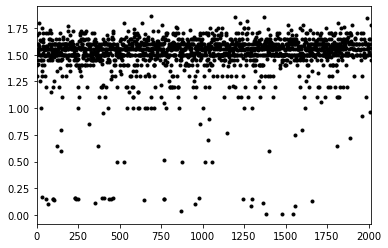

In [102]:
TEB_encontrados['height'].plot(style='k.')

site-uid
TEB_encontrados    [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
dtype: object

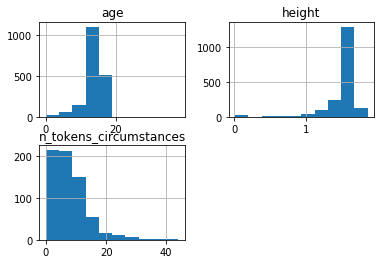

In [103]:
grouped = TEB_encontrados.groupby('site-uid')
grouped.hist()

In [19]:
grouped['n_tokens_circumstances'].agg(['min', 'mean', 'max'])

,min,mean,max
site-uid,,,
teb_encontrados,0.0,8.081481,44.0


site-uid
TEB_encontrados    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

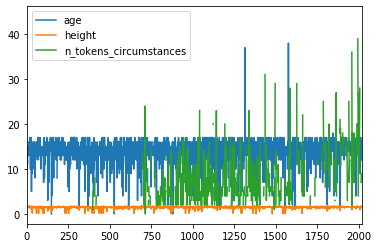

In [104]:
grouped.plot()